<a href="https://colab.research.google.com/github/zainamri/Kelompok-3-/blob/main/Salinan_dari_Telcoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# URL raw file GitHub
url = "https://raw.githubusercontent.com/arubhasy/dataset/main/Telco-Customer-Churn.csv"

# Membaca dataset
df = pd.read_csv(url)

print(f"Jumlah data terinput: {df.shape} baris")

Jumlah data terinput: (7043, 21) baris


In [2]:
# Menampilkan 5 baris pertama
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


menelaah data

In [3]:
print("--- Analisis Tipe Data ---")
df.info()

--- Analisis Tipe Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7040.000000,7043.000000
mean,0.162147,35.043892,64.761692
std,0.368612,115.282871,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,7100.000000,118.750000


In [5]:
# Jumlah nilai unik per kolom
print("\n=== Nilai Unik per Kolom ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik")


=== Nilai Unik per Kolom ===
customerID: 7043 nilai unik
gender: 4 nilai unik
SeniorCitizen: 2 nilai unik
Partner: 2 nilai unik
Dependents: 2 nilai unik
tenure: 78 nilai unik
PhoneService: 2 nilai unik
MultipleLines: 3 nilai unik
InternetService: 3 nilai unik
OnlineSecurity: 3 nilai unik
OnlineBackup: 3 nilai unik
DeviceProtection: 3 nilai unik
TechSupport: 3 nilai unik
StreamingTV: 3 nilai unik
StreamingMovies: 3 nilai unik
Contract: 3 nilai unik
PaperlessBilling: 2 nilai unik
PaymentMethod: 4 nilai unik
MonthlyCharges: 1585 nilai unik
TotalCharges: 6531 nilai unik
Churn: 2 nilai unik


validasi

In [6]:
print("Pengecekan Data Duplikat:")
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

Pengecekan Data Duplikat:
Jumlah baris duplikat: 0


In [7]:
print("Pengecekan Nilai Hilang Awal:")
print(df.isnull().sum())

Pengecekan Nilai Hilang Awal:
customerID          0
gender              5
SeniorCitizen       0
Partner             0
Dependents          0
tenure              3
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


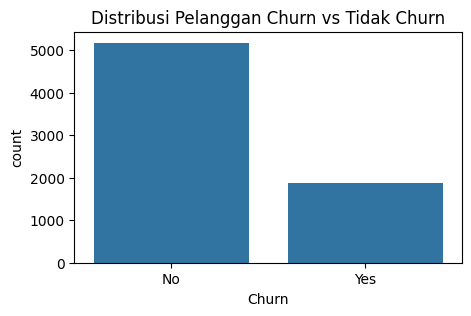

In [8]:
# Distribusi Variabel Target 'Churn'
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Churn')
plt.title('Distribusi Pelanggan Churn vs Tidak Churn')
plt.show()

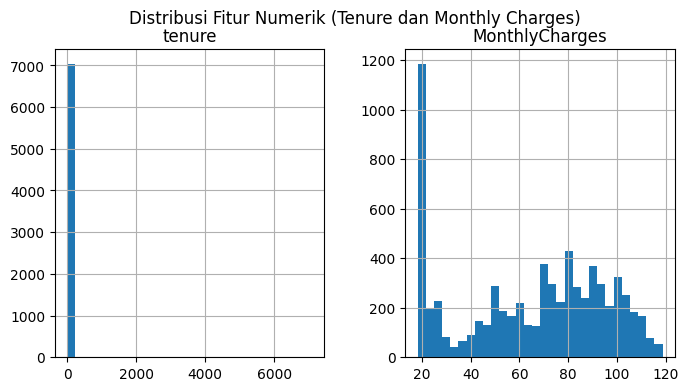

In [9]:
# Distribusi untuk beberapa fitur numerik penting
numerical_features = ['tenure', 'MonthlyCharges']
df[numerical_features].hist(bins=30, figsize=(8, 4))
plt.suptitle('Distribusi Fitur Numerik (Tenure dan Monthly Charges)')
plt.show()

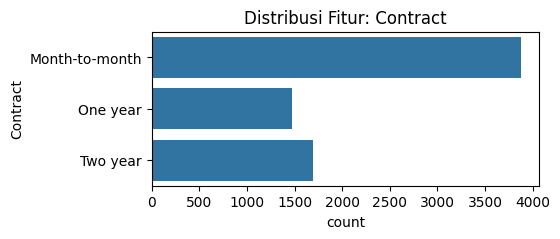

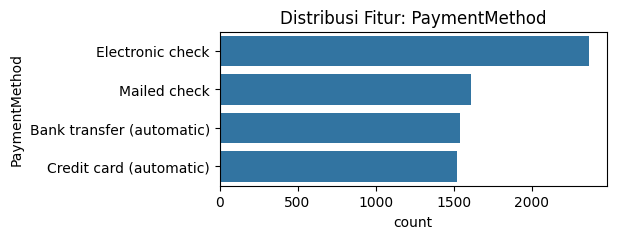

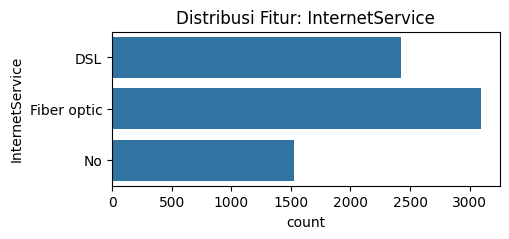

In [10]:
# Distribusi untuk beberapa fitur kategorikal penting
categorical_features = ['Contract', 'PaymentMethod', 'InternetService']
for col in categorical_features:
    plt.figure(figsize=(5, 2))
    sns.countplot(data=df, y=col)
    plt.title(f'Distribusi Fitur: {col}')
    plt.show()

korelasi

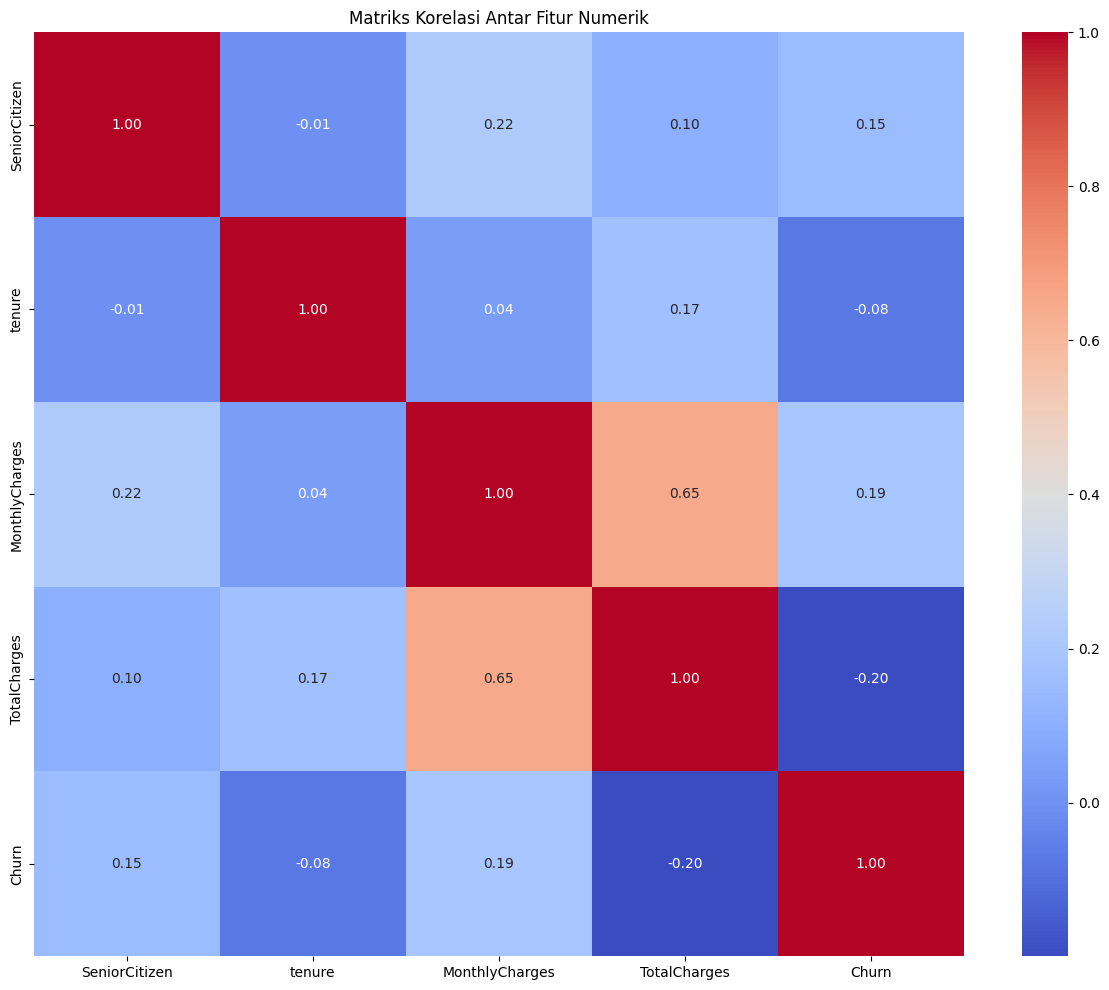

In [11]:
# Membuat salinan dataframe untuk analisis korelasi
# Membuat salinan dataframe untuk analisis korelasi
df_corr = df.copy()
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')
df_corr['Churn'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})
numerical_cols_for_corr = df_corr.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 12))
sns.heatmap(df_corr[numerical_cols_for_corr].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()


outlier cek

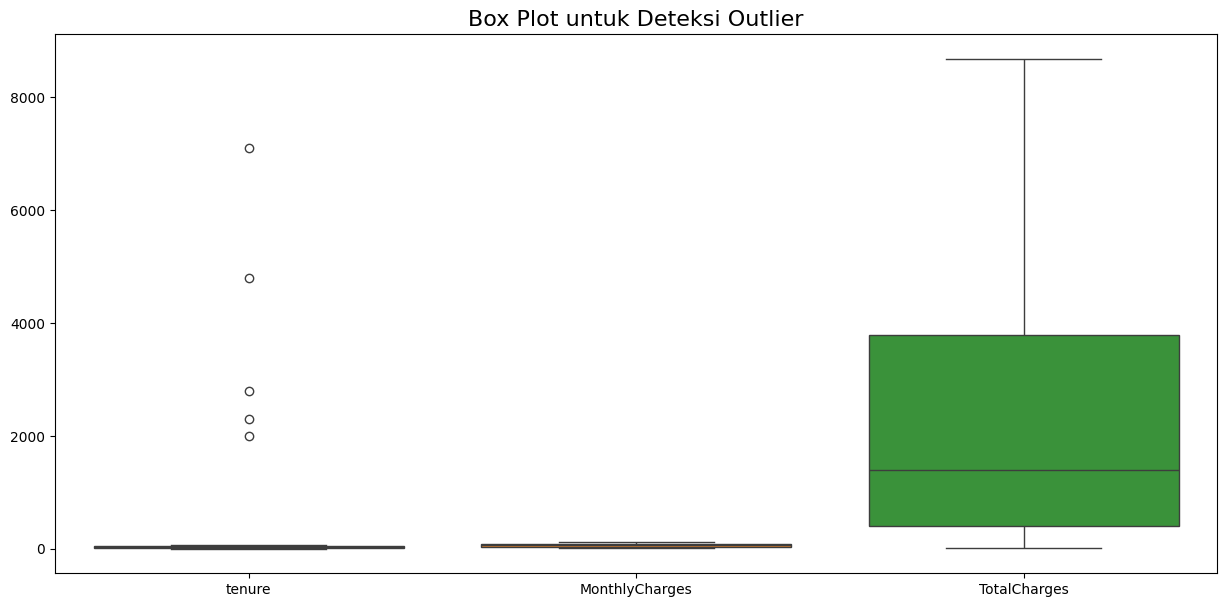

In [12]:
# Mentukan kolom numerik yang akan diperiksa (termasuk TotalCharges setelah diperbaiki)
kolom_numerik_cek = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Buat dataframe sementara hanya untuk pengecekan outlier
df_cek_outlier = df.copy()
df_cek_outlier['TotalCharges'] = pd.to_numeric(df_cek_outlier['TotalCharges'], errors='coerce')
df_cek_outlier.dropna(inplace=True)

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_cek_outlier[kolom_numerik_cek])
plt.title('Box Plot untuk Deteksi Outlier', fontsize=16)
plt.show()


PEMBERSIHAN DAN PERSIAPAN DATA (PREPROCESSING)

In [13]:
# Menghapus kolom customerID yang tidak relevan
df.drop('customerID', axis=1, inplace=True)

In [14]:
# Memperbaiki kolom 'TotalCharges' yang seharusnya numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Jumlah nilai hilang di 'TotalCharges' setelah konversi: {df['TotalCharges'].isnull().sum()}")
df.dropna(inplace=True)

Jumlah nilai hilang di 'TotalCharges' setelah konversi: 11


In [15]:
# Menghapus baris yang memiliki data hilang (NaN)
df.dropna(inplace=True)

In [16]:
# Penanganan outlier
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outlier di kolom {col}: {len(outliers)} baris")

Outlier di kolom tenure: 5 baris
Outlier di kolom MonthlyCharges: 0 baris
Outlier di kolom TotalCharges: 0 baris


In [17]:
print("Menyamakan nilai pada kolom 'gender'...")
df['gender'] = df['gender'].replace({'F': 'Female', 'M': 'Male'})
# Memeriksa hasilnya untuk memastikan hanya ada 2 nilai unik
print("Nilai unik di kolom 'gender' setelah standardisasi:")
print(df['gender'].value_counts())

Menyamakan nilai pada kolom 'gender'...
Nilai unik di kolom 'gender' setelah standardisasi:
gender
Male      3546
Female    3479
Name: count, dtype: int64


pelabelan target dan konstruksi fitur

In [18]:
# Mengubah kolom target 'Churn' dari 'Yes'/'No' menjadi 1/0
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [19]:
# Mengubah semua sisa kolom kategorikal menjadi numerik menggunakan One-Hot Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [20]:
print("Pembersihan dan transformasi data selesai.")
print(f"Bentuk data setelah diolah: {df.shape[0]} baris, {df.shape[1]} kolom.")

Pembersihan dan transformasi data selesai.
Bentuk data setelah diolah: 7025 baris, 31 kolom.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7025 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7025 non-null   int64  
 1   tenure                                 7025 non-null   float64
 2   MonthlyCharges                         7025 non-null   float64
 3   TotalCharges                           7025 non-null   float64
 4   Churn                                  7025 non-null   int64  
 5   gender_Male                            7025 non-null   bool   
 6   Partner_Yes                            7025 non-null   bool   
 7   Dependents_Yes                         7025 non-null   bool   
 8   PhoneService_Yes                       7025 non-null   bool   
 9   MultipleLines_No phone service         7025 non-null   bool   
 10  MultipleLines_Yes                      7025 non-null   bool   
 11  InternetS

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000
mean,0.162420,35.107616,64.783573,2283.251964,0.265907
std,0.368862,115.396389,30.077709,2266.970388,0.441847
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.550000,401.300000,0.000000
50%,0.000000,29.000000,70.350000,1396.900000,0.000000
75%,0.000000,56.000000,89.850000,3794.500000,1.000000
max,1.000000,7100.000000,118.750000,8684.800000,1.000000


misahin data

In [23]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']
# Membagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData telah dibagi menjadi {X_train.shape[0]} data train (latih) dan {X_test.shape[0]} data test (uji).")


Data telah dibagi menjadi 5620 data train (latih) dan 1405 data test (uji).


In [24]:
from imblearn.over_sampling import SMOTE

print("Distribusi kelas 'Churn' pada data latih SEBELUM SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
# Terapkan SMOTE HANYA pada data latih
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nDistribusi kelas 'Churn' pada data latih SETELAH SMOTE:")
print(y_train_resampled.value_counts())


Distribusi kelas 'Churn' pada data latih SEBELUM SMOTE:
Churn
0    4126
1    1494
Name: count, dtype: int64

Distribusi kelas 'Churn' pada data latih SETELAH SMOTE:
Churn
0    4126
1    4126
Name: count, dtype: int64


Bangun dan Latih Model :)



In [25]:
# 1. Model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_resampled, y_train_resampled)
print("1. Model Decision Tree berhasil dilatih.")

# 2. Model Random Forest
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X_train_resampled, y_train_resampled)
print("2. Model Random Forest berhasil dilatih.")

# 3. Model LightGBM
model_lgbm = LGBMClassifier(random_state=42)
model_lgbm.fit(X_train_resampled, y_train_resampled)
print("3. Model LightGBM berhasil dilatih.")

1. Model Decision Tree berhasil dilatih.
2. Model Random Forest berhasil dilatih.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4126, number of negative: 4126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 8252, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
3. Model LightGBM berhasil dilatih.



===== EVALUASI MODEL: DECISION TREE =====
Akurasi: 70.39%
Status: Target akurasi TERPENUHI.

Laporan Klasifikasi:
              precision    recall  f1-score   support

 Tidak Churn       0.82      0.76      0.79      1031
       Churn       0.45      0.55      0.50       374

    accuracy                           0.70      1405
   macro avg       0.64      0.66      0.64      1405
weighted avg       0.72      0.70      0.71      1405



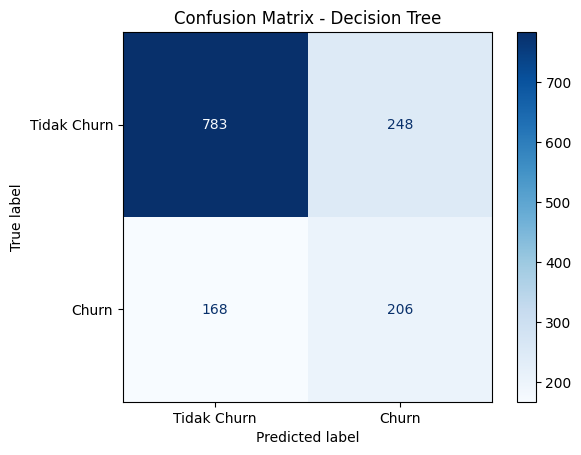


===== EVALUASI MODEL: RANDOM FOREST =====
Akurasi: 76.94%
Status: Target akurasi TERPENUHI.

Laporan Klasifikasi:
              precision    recall  f1-score   support

 Tidak Churn       0.85      0.84      0.84      1031
       Churn       0.57      0.58      0.57       374

    accuracy                           0.77      1405
   macro avg       0.71      0.71      0.71      1405
weighted avg       0.77      0.77      0.77      1405



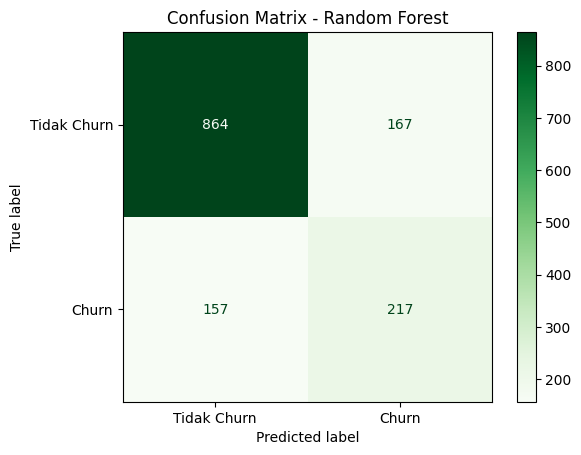


===== EVALUASI MODEL: LIGHTGBM =====
Akurasi: 77.15%
Status: Target akurasi TERPENUHI.

Laporan Klasifikasi:
              precision    recall  f1-score   support

 Tidak Churn       0.86      0.83      0.84      1031
       Churn       0.56      0.62      0.59       374

    accuracy                           0.77      1405
   macro avg       0.71      0.72      0.72      1405
weighted avg       0.78      0.77      0.77      1405



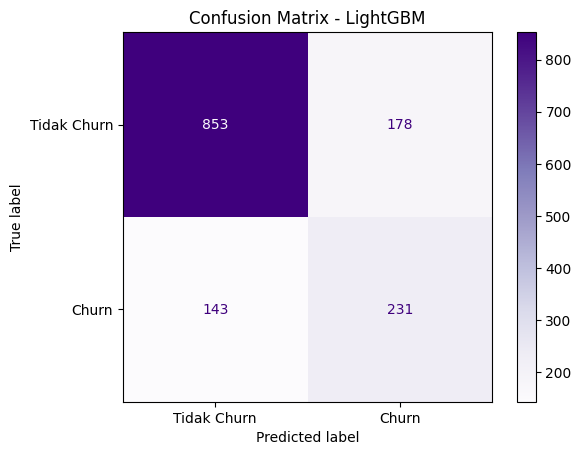

In [26]:
target_accuracy = 0.70
models = {
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "LightGBM": model_lgbm
}
results = {}

# Looping untuk evaluasi setiap model
for name, model in models.items():
    print(f"\n===== EVALUASI MODEL: {name.upper()} =====")

    # Lakukan prediksi pada data uji ASLI (X_test)
    y_pred = model.predict(X_test)

    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Akurasi: {accuracy:.2%}")

    # Cek metrik kesuksesan
    if accuracy > target_accuracy:
        print("Status: Target akurasi TERPENUHI.")
    else:
        print("Status: Target akurasi TIDAK TERPENUHI.")

    # Tampilkan laporan klasifikasi
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred, target_names=['Tidak Churn', 'Churn']))

    # Tampilkan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Churn', 'Churn'])
    disp.plot(cmap=plt.cm.Blues if name == "Decision Tree" else plt.cm.Greens if name == "Random Forest" else plt.cm.Purples)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [27]:
# Membuat Tabel Perbandingan Akhir
df_results = pd.DataFrame(list(results.items()), columns=['Model', 'Akurasi']).sort_values('Akurasi', ascending=False)
print("\n\n===== TABEL PERBANDINGAN AKURASI AKHIR =====")
print(df_results)



===== TABEL PERBANDINGAN AKURASI AKHIR =====
           Model   Akurasi
2       LightGBM  0.771530
1  Random Forest  0.769395
0  Decision Tree  0.703915


In [29]:
print("\n--- MEMULAI HYPERPARAMETER TUNING PADA DATA YANG SUDAH DI-SMOTE ---")
# Catatan: Proses ini mungkin akan memakan waktu beberapa menit, tergantung spesifikasi komputer Anda.

# --- 1. Definisikan Parameter Grid untuk Setiap Model ---
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_leaf': [2, 5]
}

param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 40]
}

# --- 2. Siapkan Proses Tuning dengan GridSearchCV ---
# Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt, cv=3, n_jobs=-1, scoring='accuracy')

# Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')

# LightGBM
grid_search_lgbm = GridSearchCV(estimator=LGBMClassifier(random_state=42),
                                param_grid=param_grid_lgbm, cv=3, n_jobs=-1, scoring='accuracy')

# --- 3. Latih Setiap Proses Tuning ---
print("1. Menjalankan Tuning untuk Decision Tree...")
grid_search_dt.fit(X_train_resampled, y_train_resampled)
model_dt_tuned = grid_search_dt.best_estimator_
print(f"   -> Parameter terbaik ditemukan: {grid_search_dt.best_params_}")

print("\n2. Menjalankan Tuning untuk Random Forest...")
grid_search_rf.fit(X_train_resampled, y_train_resampled)
model_rf_tuned = grid_search_rf.best_estimator_
print(f"   -> Parameter terbaik ditemukan: {grid_search_rf.best_params_}")

print("\n3. Menjalankan Tuning untuk LightGBM...")
grid_search_lgbm.fit(X_train_resampled, y_train_resampled)
model_lgbm_tuned = grid_search_lgbm.best_estimator_
print(f"   -> Parameter terbaik ditemukan: {grid_search_lgbm.best_params_}")




--- MEMULAI HYPERPARAMETER TUNING PADA DATA YANG SUDAH DI-SMOTE ---
1. Menjalankan Tuning untuk Decision Tree...
   -> Parameter terbaik ditemukan: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}

2. Menjalankan Tuning untuk Random Forest...
   -> Parameter terbaik ditemukan: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}

3. Menjalankan Tuning untuk LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4126, number of negative: 4126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 8252, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
   -> Parameter terbaik di

In [30]:
# Kumpulkan model terbaik setelah di-tuning
tuned_models = {
    "Decision Tree (SMOTE+Tuned)": model_dt_tuned,
    "Random Forest (SMOTE+Tuned)": model_rf_tuned,
    "LightGBM (SMOTE+Tuned)": model_lgbm_tuned
}
tuned_results = {}

# Looping untuk evaluasi setiap model yang sudah di-tuning
for name, model in tuned_models.items():
    y_pred = model.predict(X_test) # Evaluasi pada data uji asli
    accuracy = accuracy_score(y_test, y_pred)
    tuned_results[name] = accuracy

    print(f"\n===== EVALUASI MODEL: {name.upper()} =====")
    print(f"Akurasi: {accuracy:.2%}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred, target_names=['Tidak Churn', 'Churn']))

# Membuat Tabel Perbandingan Final
df_tuned_results = pd.DataFrame(list(tuned_results.items()), columns=['Model', 'Akurasi']).sort_values('Akurasi', ascending=False)
print("\n\n===== TABEL PERBANDINGAN AKURASI FINAL (SETELAH SMOTE + TUNING) =====")
print(df_tuned_results)


===== EVALUASI MODEL: DECISION TREE (SMOTE+TUNED) =====
Akurasi: 73.52%

Laporan Klasifikasi:
              precision    recall  f1-score   support

 Tidak Churn       0.84      0.78      0.81      1031
       Churn       0.50      0.60      0.55       374

    accuracy                           0.74      1405
   macro avg       0.67      0.69      0.68      1405
weighted avg       0.75      0.74      0.74      1405


===== EVALUASI MODEL: RANDOM FOREST (SMOTE+TUNED) =====
Akurasi: 77.30%

Laporan Klasifikasi:
              precision    recall  f1-score   support

 Tidak Churn       0.86      0.82      0.84      1031
       Churn       0.56      0.64      0.60       374

    accuracy                           0.77      1405
   macro avg       0.71      0.73      0.72      1405
weighted avg       0.78      0.77      0.78      1405


===== EVALUASI MODEL: LIGHTGBM (SMOTE+TUNED) =====
Akurasi: 77.44%

Laporan Klasifikasi:
              precision    recall  f1-score   support

 Tidak Chur